## Goal
- Clean the data
- Analyse the data to find out the trends
- Grenerating the recommendation based on the trendtries

Few question are:
- How has the number of movies released per year changed over the last 20-30 years
- Comparison of tv shows vs movies
- What is the best time to launch a TV show
- Analysis of actors/directors of different types of shows/movies.
- Does Netflix has more focus on TV Shows than movies in recent years
- Understanding what content is available in different countries

## Importing necessary libraries

In [391]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import and overview

In [392]:
# Import the data 
df=pd.read_csv('netflix.csv')

In [457]:
# Overview of data
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [394]:
# Shape of data
df.shape

(8807, 12)

In [395]:
# analysing the verious data types of all the coulumn present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observations:
- 8807 entries and 12 columns are available
- all columns except release_year are of object data type. i.e. string
- date_added needed to be converted into date format

In [396]:
# occurance of each rating
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

## Data Cleaening

In [397]:
#as there are some space present at start in date string it needed to be removed
df['date_added']=df['date_added'].apply(lambda x: str(x).strip())
# convert date from object (string) data type to datetime
df['date_added']=pd.to_datetime(df['date_added']) 


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [399]:
# discription of data 
df.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [400]:
# Data cleaning
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [401]:
#percent of missing values
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

- significant list of entry has missing director name (30%)
- and cast and country is missing in 10% of data
- 4 missing number of rating wich can be replaced with mode value
- duration is missing in 3 values

In [402]:
# Handling missing Values
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [403]:
# As duration null values are shown in rating as in min it needed to be swqped between rating to duration
df['duration'],df['rating']=np.where(df['duration'].isna(),(df['rating'],df['duration']),(df['duration'],df['rating']))

In [404]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [405]:
# Now 7 missing values in rating can be replaced with mode
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

# Now 10 missing values in date added can be replaced with mode
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)

In [406]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [407]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8804,15-Aug,2
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
rating,8807,14,TV-MA,3214
duration,8807,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


In [408]:
# Convert the duration from string to int by droping min/season word
constraint=np.array(df['duration'].apply(lambda x: str(x).split()).tolist())
df['duration']=constraint[:,0]
df['duration']=df['duration'].astype(int)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int32         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 791.4+ KB


In [410]:
# Finding the unique values
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            14
duration         210
listed_in        514
description     8775
dtype: int64

- From above total entries are 8807 and all are having different Title so all are unique

## Table for Cast

In [411]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_cast=pd.DataFrame(constraint, index=df['title'])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']
df_cast.loc[df_cast['cast'] == 'nan', 'cast'] = np.NaN
df_cast.dropna(axis=0,inplace=True)

In [412]:
df_cast.head()

,title,cast
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel


In [413]:
df_cast.shape

(64126, 2)

### Table for director

In [414]:
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_director=pd.DataFrame(constraint, index=df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director.drop('level_1',axis=1,inplace=True)
df_director.columns=['title','director']
df_director.loc[df_director['director'] == 'nan', 'director'] = np.NaN
df_director.dropna(axis=0,inplace=True)

In [415]:
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
2,Ganglands,Julien Leclercq
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha


In [416]:
df_director.shape

(6978, 2)

### Table for listed_in

In [417]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_listed_in=pd.DataFrame(constraint, index=df['title'])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace=True)
df_listed_in.drop('level_1',axis=1,inplace=True)
df_listed_in.columns=['title','listed_in']
df_listed_in.loc[df_listed_in['listed_in'] == 'nan', 'listed_in'] = np.NaN
df_listed_in.dropna(axis=0,inplace=True)

In [418]:
df_listed_in.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [419]:
df_listed_in.shape

(19323, 2)

### Table for country

In [420]:
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(constraint, index=df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country.drop('level_1',axis=1,inplace=True)
df_country.columns=['title','country']
df_country['country']=df_country['country'].apply(lambda x: str(x).strip())
df_country.loc[df_country['country'] == 'nan', 'country'] = np.NaN # Converting nan string to NaN
df_country.drop(index=df_country.loc[df_country['country'] == ''].index,axis=0,inplace=True) # Dropping blank values rows
df_country.dropna(axis=0,inplace=True)  # Dropping NaN rows values

In [421]:
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
8,Sankofa,Ghana


In [422]:
df_country.shape

(10012, 2)

### Creating merged DataFrame

In [458]:
# Merged File
df_merged=df.merge(df_cast, on='title', how='left')
df_merged.drop('cast_x',axis=1,inplace=True)
df_merged.rename({'cast_y':'cast'},axis=1,inplace=True)
df_merged=df_merged.merge(df_director, on='title', how='left')
df_merged.drop('director_x',axis=1,inplace=True)
df_merged.rename({'director_y':'director'},axis=1,inplace=True)
df_merged=df_merged.merge(df_listed_in, on='title', how='left')
df_merged.drop('listed_in_x',axis=1,inplace=True)
df_merged.rename({'listed_in_y':'listed_in'},axis=1,inplace=True)
df_merged=df_merged.merge(df_country, on='title', how='left')
df_merged.drop('country_x',axis=1,inplace=True)
df_merged.rename({'country_y':'country'},axis=1,inplace=True)
df_merged.head(3)

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",NaN,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,TV Dramas,South Africa


# Analysis

#### Comparison of tv shows vs movies

In [424]:
df['type'].value_counts(normalize=True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

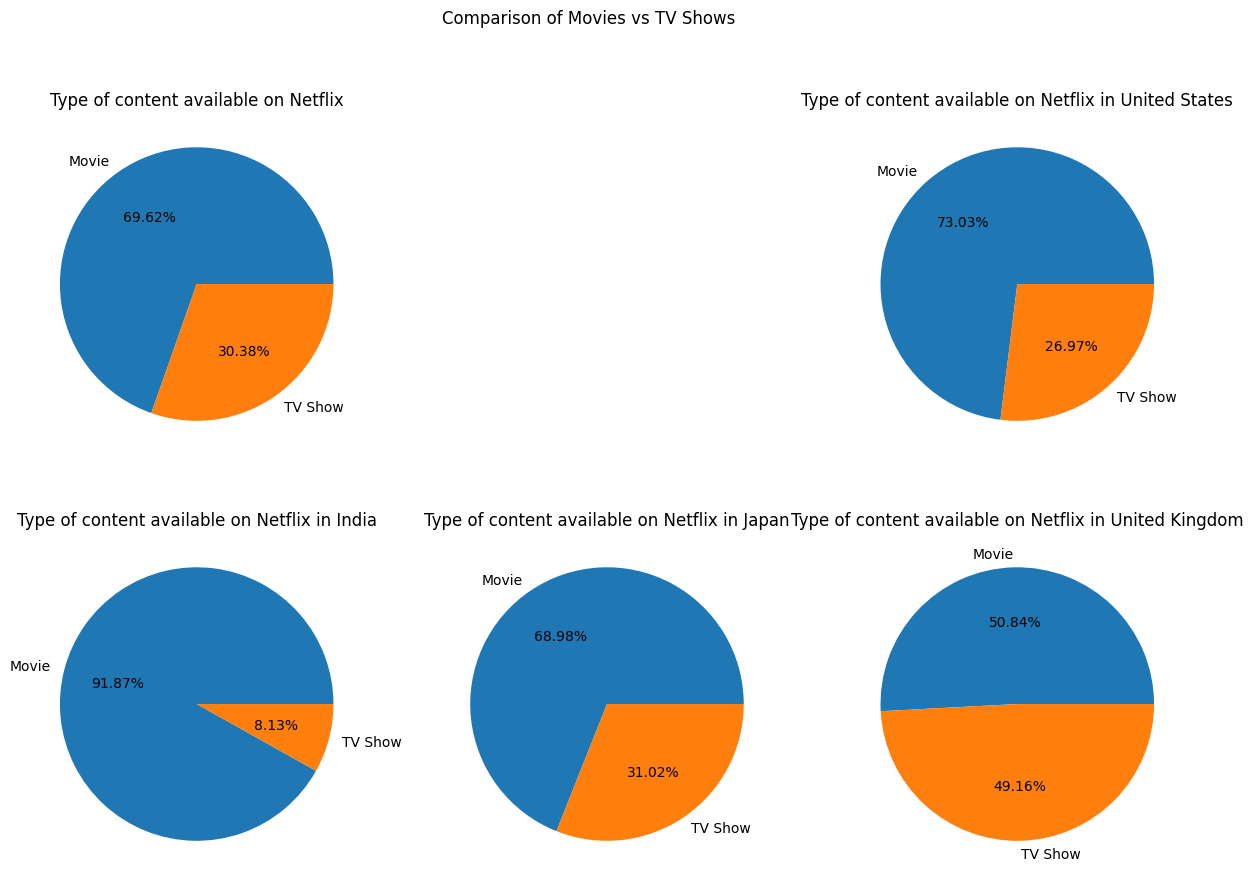

In [425]:
fig=plt.figure(figsize=(15,10))

plt.suptitle('Comparison of Movies vs TV Shows')
plt.subplot(2,3,1)
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%.2f%%')
plt.title('Type of content available on Netflix')

plt.subplot(2,3,3)
plt.pie(df[df['country']=='United States']['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%.2f%%')
plt.title('Type of content available on Netflix in United States')

plt.subplot(2,3,4)
plt.pie(df[df['country']=='India']['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%.2f%%')
plt.title('Type of content available on Netflix in India')

plt.subplot(2,3,5)
plt.pie(df[df['country']=='Japan']['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%.2f%%')
plt.title('Type of content available on Netflix in Japan')

plt.subplot(2,3,6)
plt.pie(df[df['country']=='United Kingdom']['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%.2f%%')
plt.title('Type of content available on Netflix in United Kingdom')
plt.show()

Insighths
- Nomber of movies released are greater than than of the web series
- More movies are released in india as compared to TV Shows
- Where as in United kingdam TV Shows and movies percentage is almost equal

#### How has the number of movies released per year

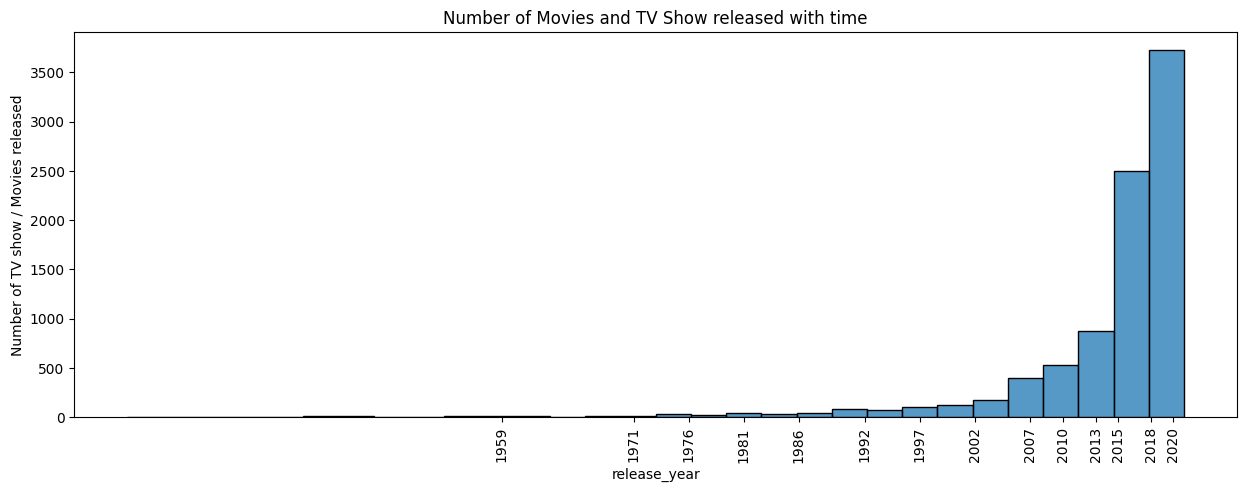

In [426]:
fig=plt.figure(figsize=[15,5])
sns.histplot(data=df,x='release_year',bins=30)
plt.xticks(ticks=df_plot['release_year'][::5],rotation ='vertical')
plt.ylabel('Number of TV show / Movies released')
#plt.grid(True)
plt.title('Number of Movies and TV Show released with time')
plt.show()

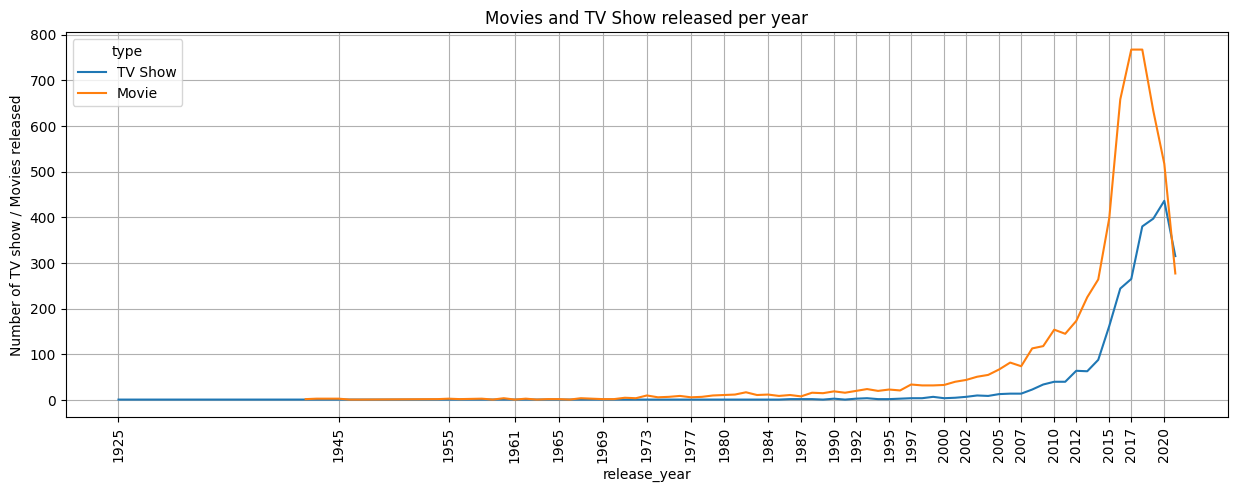

In [427]:
df_plot=pd.DataFrame(df.groupby(['release_year','type']).count()['title']).reset_index()
fig=plt.figure(figsize=[15,5])
sns.lineplot(data=df_plot,x='release_year',y='title',hue='type')
plt.xticks(ticks=df_plot['release_year'][::5],rotation ='vertical')
plt.ylabel('Number of TV show / Movies released')
plt.grid(True)
plt.title('Movies and TV Show released per year')
plt.show()

Insight:
- For initial years the no of movies and Tv Shows are relatively less
- Where movies grows at higher rate than TV shows 

#### How has the number of movies released per year changed over the last 20-30 years?

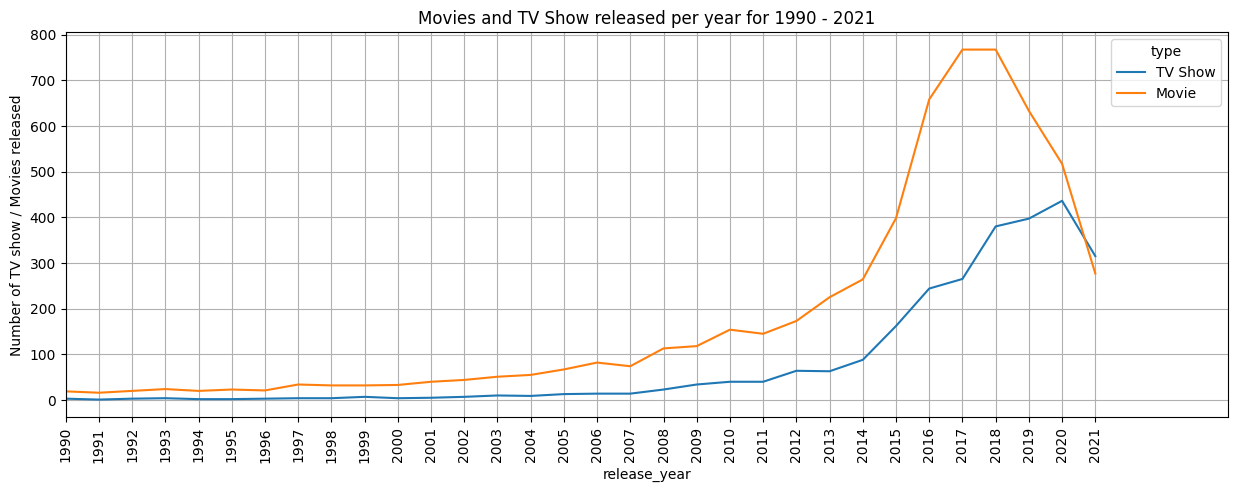

In [428]:
df_plot=pd.DataFrame(df.groupby(['release_year','type']).count()['title']).reset_index()
fig=plt.figure(figsize=[15,5])
sns.lineplot(data=df_plot,x='release_year',y='title',hue='type')
plt.xticks(ticks=df_plot['release_year'][::2],rotation ='vertical')
plt.ylabel('Number of TV show / Movies released')
plt.xlim(left= 1990, right = 2025)
plt.title('Movies and TV Show released per year for 1990 - 2021')
plt.grid(True)
plt.show()

Insignts
- Altho TV shows are started in 1925 It has start growing after 2000 while high spike is obcserved after 2014
- similer in movies a high spkie is observed after 2014 but after 2018 no of movies released is started declining.
- Trend show the TV show has more preference over Movies
- Decline in 2021 may be the result of limited data available or COVID 

#### What is the best time to launch a TV showies

In [429]:
df1=df.copy()
df1['month'] = pd.DatetimeIndex(df['date_added']).month
df1['day'] = pd.DatetimeIndex(df['date_added']).day
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24


In [430]:
plot2=df1.groupby(['month','type']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

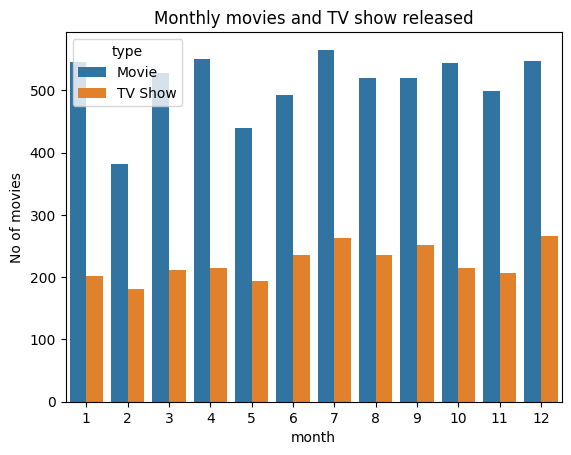

In [431]:
plt.figure()
sns.barplot(data=plot2,x='month',y='title',hue='type')
plt.ylabel('No of movies')
plt.title('Monthly movies and TV show released')
plt.show()

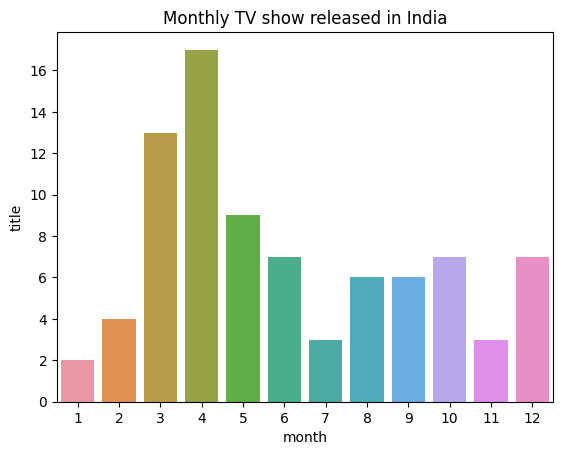

In [432]:
df1_c=df_country.merge(df1,on='title',how='left')
plot2=df1_c[(df1_c['type']=='TV Show')& (df1_c['country_x']=='India')].groupby('month').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.barplot(data=plot2,x='month',y='title')

plt.title('Monthly TV show released in India')
plt.show()

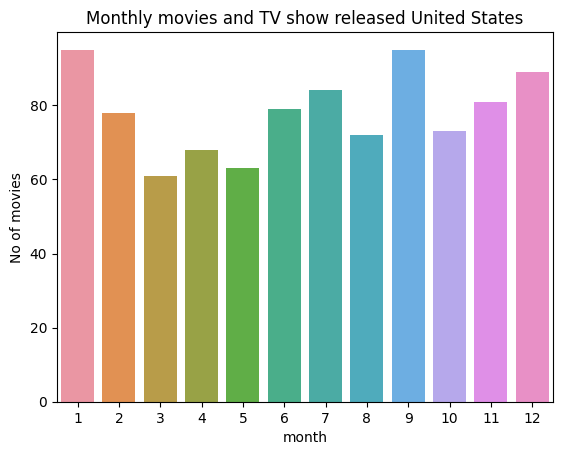

In [433]:
df1_c=df_country.merge(df1,on='title',how='left')
plot2=df1_c[(df1_c['type']=='TV Show')& (df1_c['country_x']=='United States')].groupby('month').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.barplot(data=plot2,x='month',y='title')
plt.ylabel('No of movies')
plt.title('Monthly movies and TV show released United States')
plt.show()

Insights (if we consider date added is the date of launch)
- December/ year end is best time to launch TV Show
- For India April, March is best time to aunch TV Show
- For US September and Year end and Start of New year is best time to launch TV Show

#### Analysis of actors/directors of different types of shows/movies.

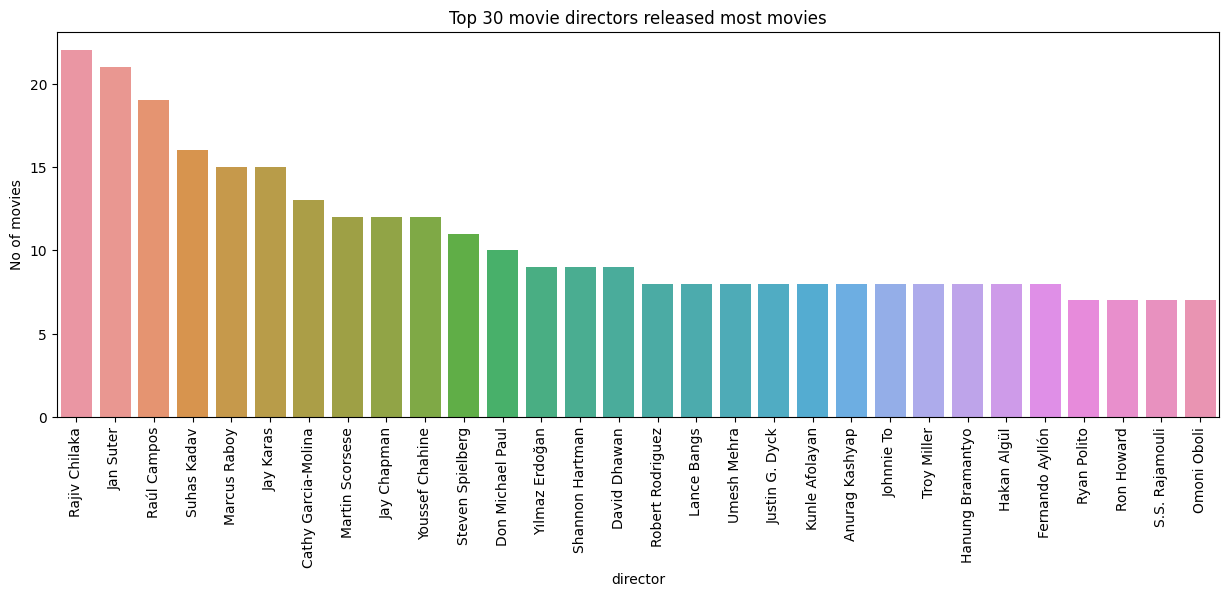

In [434]:
fig=plt.figure(figsize=(15,5))
plot5=df_merged[df_merged['type']=='Movie'].groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(30)
plt.xticks(rotation=90)
sns.barplot(data=plot5,x='director',y='title')
plt.ylabel('No of movies')
plt.title('Top 30 movie directors released most movies')
plt.show()

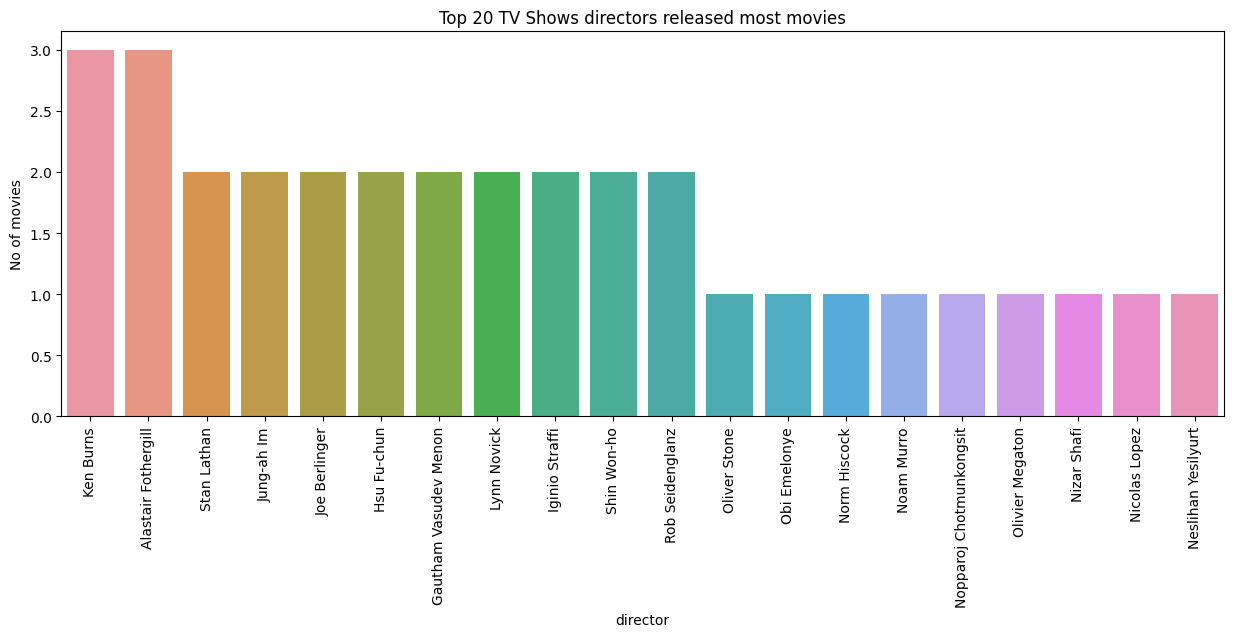

In [435]:
fig=plt.figure(figsize=(15,5))
plot5=df_merged[df_merged['type']=='TV Show'].groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(data=plot5,x='director',y='title')
plt.ylabel('No of movies')
plt.title('Top 20 TV Shows directors released most movies')
plt.show()

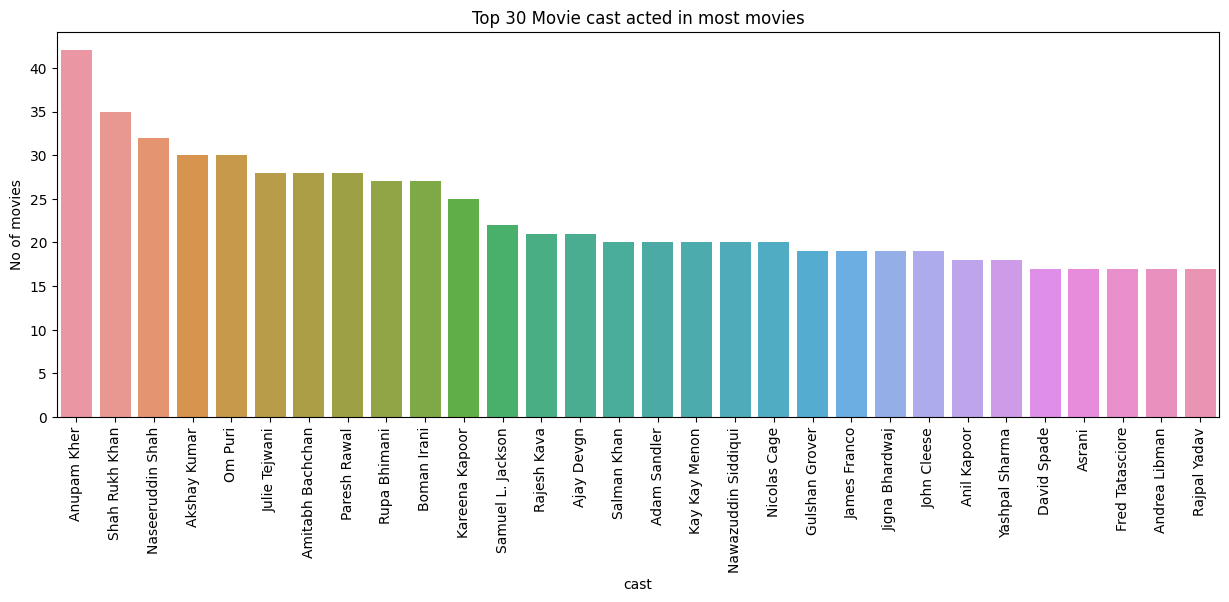

In [436]:
fig=plt.figure(figsize=(15,5))
plot5=df_merged[df_merged['type']=='Movie'].groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(30)
plt.xticks(rotation=90)
sns.barplot(data=plot5,x='cast',y='title')
plt.ylabel('No of movies')
plt.title('Top 30 Movie cast acted in most movies')
plt.show()

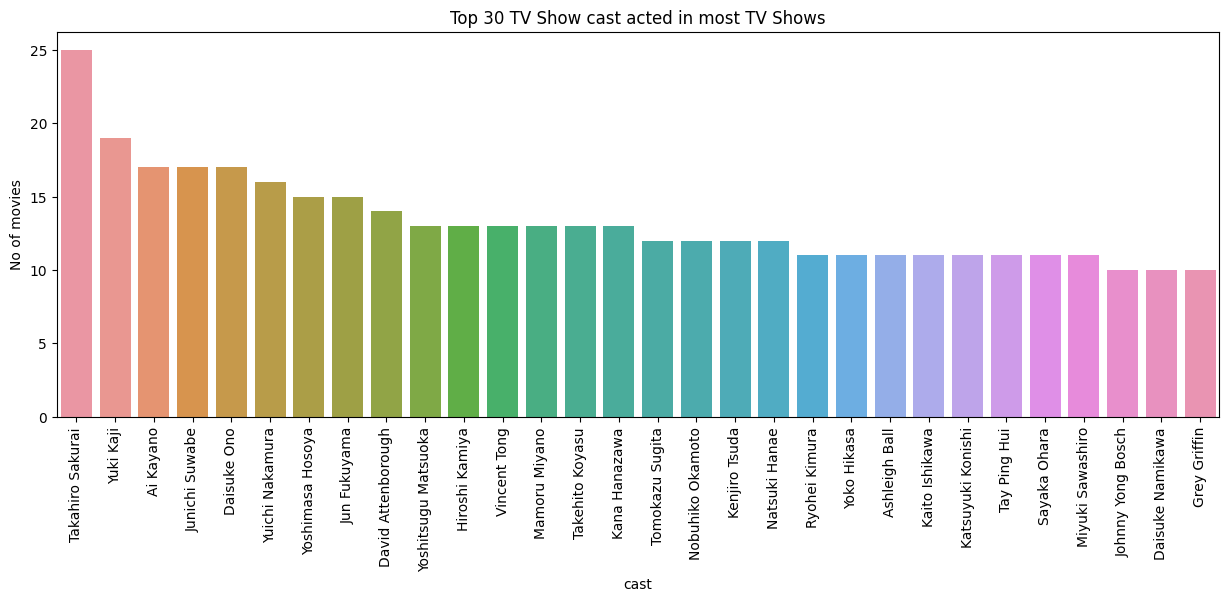

In [437]:
fig=plt.figure(figsize=(15,5))
plot5=df_merged[df_merged['type']=='TV Show'].groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(30)
plt.xticks(rotation=90)
sns.barplot(data=plot5,x='cast',y='title')
plt.ylabel('No of movies')
plt.title('Top 30 TV Show cast acted in most TV Shows')
plt.show()

Insights
- Indian cast has more repetation rate for casting in movies
- Anupan Kher, Sharukh Khan are most popullar actor in movies
- Takahiro Sakurai, Yuki Kaji are populer cast in Tv Shows

#### Does Netflix has more focus on TV Shows than movies in recent years

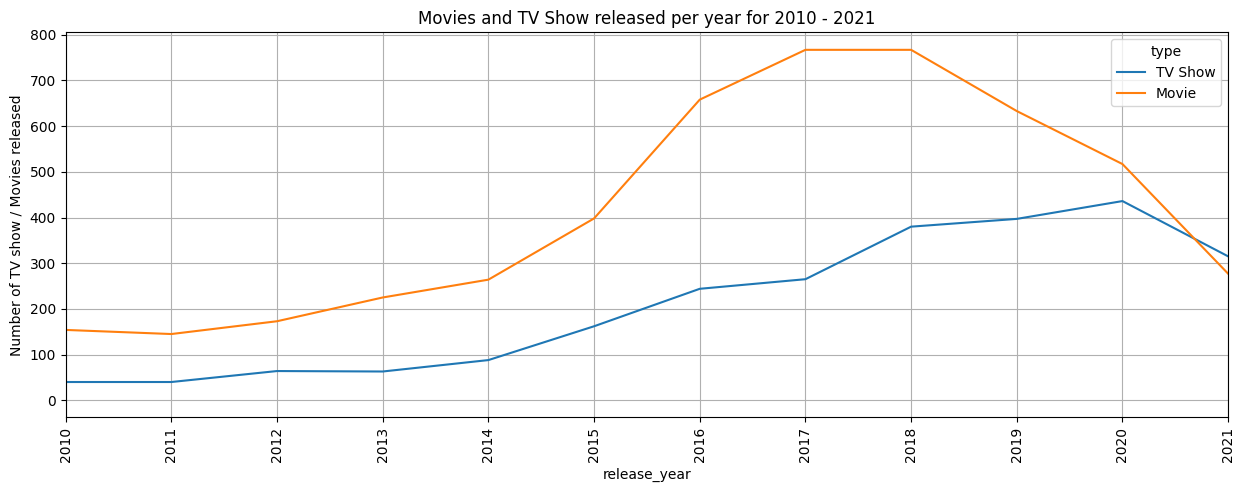

In [438]:
df_plot=pd.DataFrame(df.groupby(['release_year','type']).count()['title']).reset_index()
fig=plt.figure(figsize=[15,5])
sns.lineplot(data=df_plot,x='release_year',y='title',hue='type')
plt.xticks(ticks=df_plot['release_year'][::2],rotation ='vertical')
plt.ylabel('Number of TV show / Movies released')
plt.xlim(left= 2010, right = 2021)
plt.title('Movies and TV Show released per year for 2010 - 2021')
plt.grid(True)
plt.show()

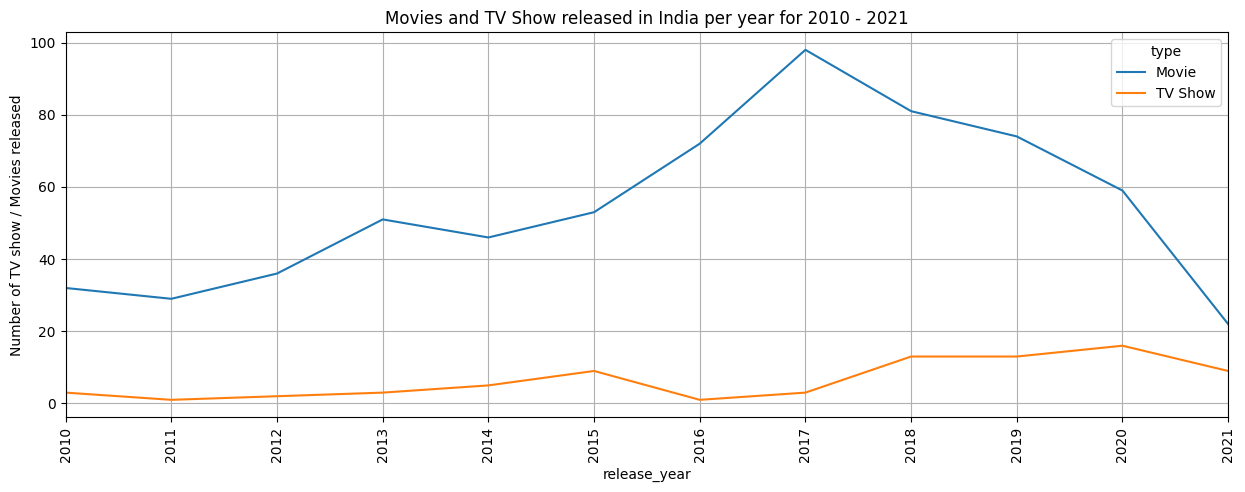

In [439]:
df_plot=pd.DataFrame(df[df['country']=='India'].groupby(['release_year','type']).count()['title']).reset_index()
fig=plt.figure(figsize=[15,5])
sns.lineplot(data=df_plot,x='release_year',y='title',hue='type')
plt.xticks(ticks=df_plot['release_year'][::2],rotation ='vertical')
plt.ylabel('Number of TV show / Movies released')
plt.xlim(left= 2010, right = 2021)
plt.title('Movies and TV Show released in India per year for 2010 - 2021')
plt.grid(True)
plt.show()

Insights
- In recent years TV Shows are growing fast and number of movies released is declining
- Tv shows are more recommended than Movies in upcomming year
- But in India Popularity of TV show is growing but still Netfilx has to focus on Movies as its still more popular than tv show

#### Understanding what content is available in different countries

In [440]:
df_merged.groupby(['country','type']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(15)

,country,type,title
175,United States,Movie,2750
66,India,Movie,961
176,United States,TV Show,938
172,United Kingdom,Movie,532
26,Canada,Movie,319
51,France,Movie,303
173,United Kingdom,TV Show,272
80,Japan,TV Show,199
54,Germany,Movie,182
151,Spain,Movie,171


Insights
- Top movies released contries are United States, India, United Kingdom, Canada, France
- Top TV Show released contires are United States, United Kingdom, Japan, South Korea, Canada

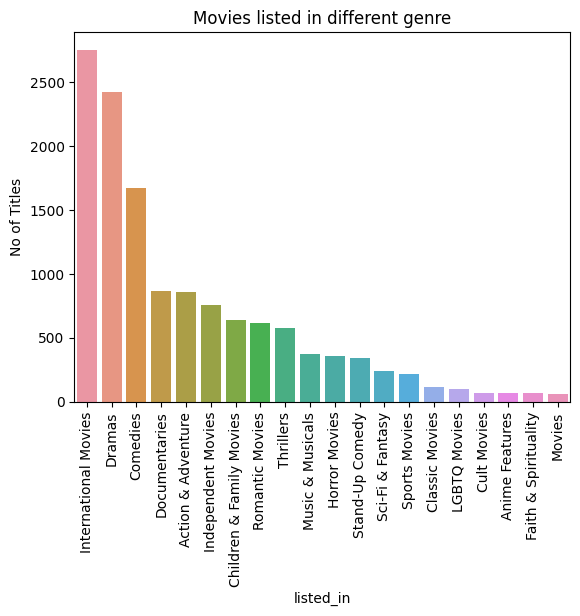

In [441]:
plot4=df_merged[df_merged['type']=='Movie'].groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.xticks(rotation=90)
sns.barplot(data=plot4,x='listed_in',y='title')
plt.title('Movies listed in different genre')
plt.ylabel('No of Titles')
plt.show()

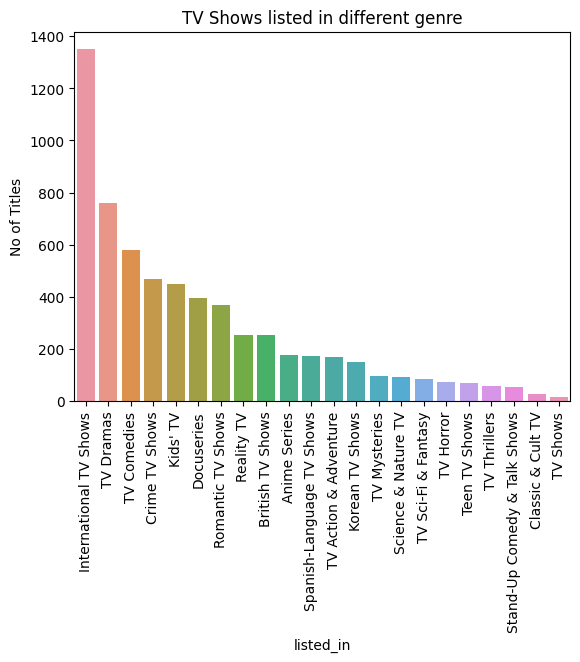

In [442]:
plot4=df_merged[df_merged['type']=='TV Show'].groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.xticks(rotation=90)
sns.barplot(data=plot4,x='listed_in',y='title')
plt.ylabel('No of Titles')
plt.title('TV Shows listed in different genre')
plt.show()

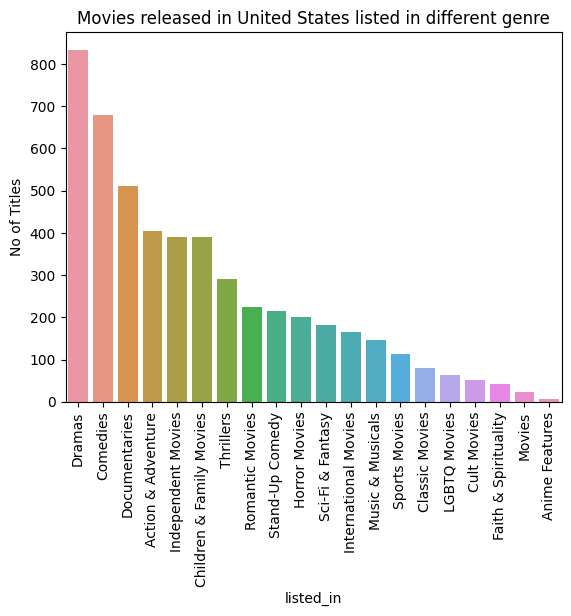

In [443]:
plot4=df_merged[(df_merged['country']=='United States') & (df_merged['type']=='Movie')].groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.xticks(rotation=90)
sns.barplot(data=plot4,x='listed_in',y='title')
plt.ylabel('No of Titles')
plt.title('Movies released in United States listed in different genre')
plt.show()

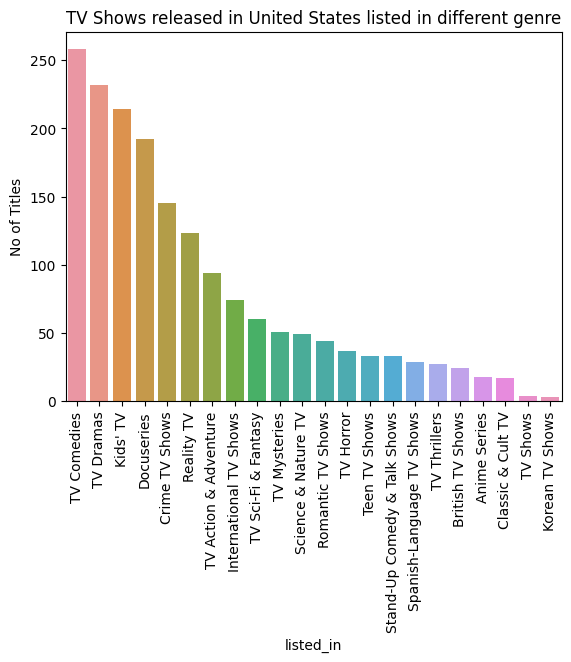

In [444]:
plot4=df_merged[(df_merged['country']=='United States') & (df_merged['type']=='TV Show')].groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.xticks(rotation=90)
sns.barplot(data=plot4,x='listed_in',y='title')
plt.ylabel('No of Titles')
plt.title('TV Shows released in United States listed in different genre')
plt.show()

Insights
- Dramas and Comedy are most popular Genre in United states
- International TV shows and International Movies are most populer genre and is recommended

### Movie duration

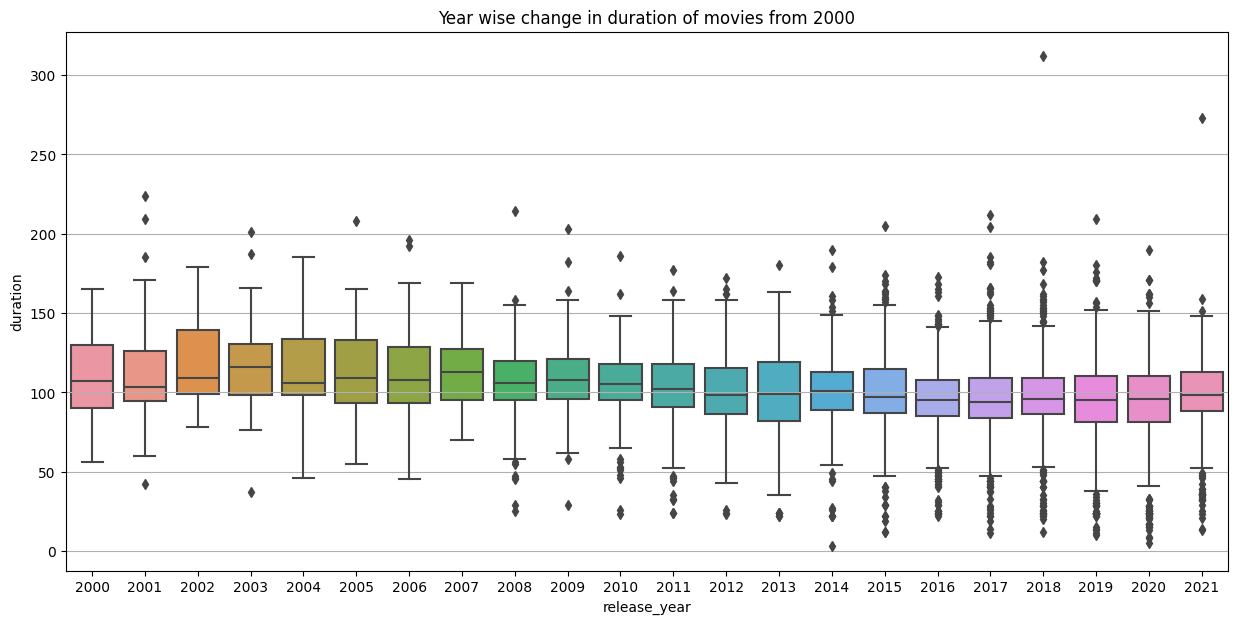

In [445]:
plt.figure(figsize=(15,7))
plt.grid()
sns.boxplot(data=df[(df['type']=='Movie')& (df['release_year']>=2000)], y='duration',x='release_year')
plt.title('Year wise change in duration of movies from 2000')
plt.show()

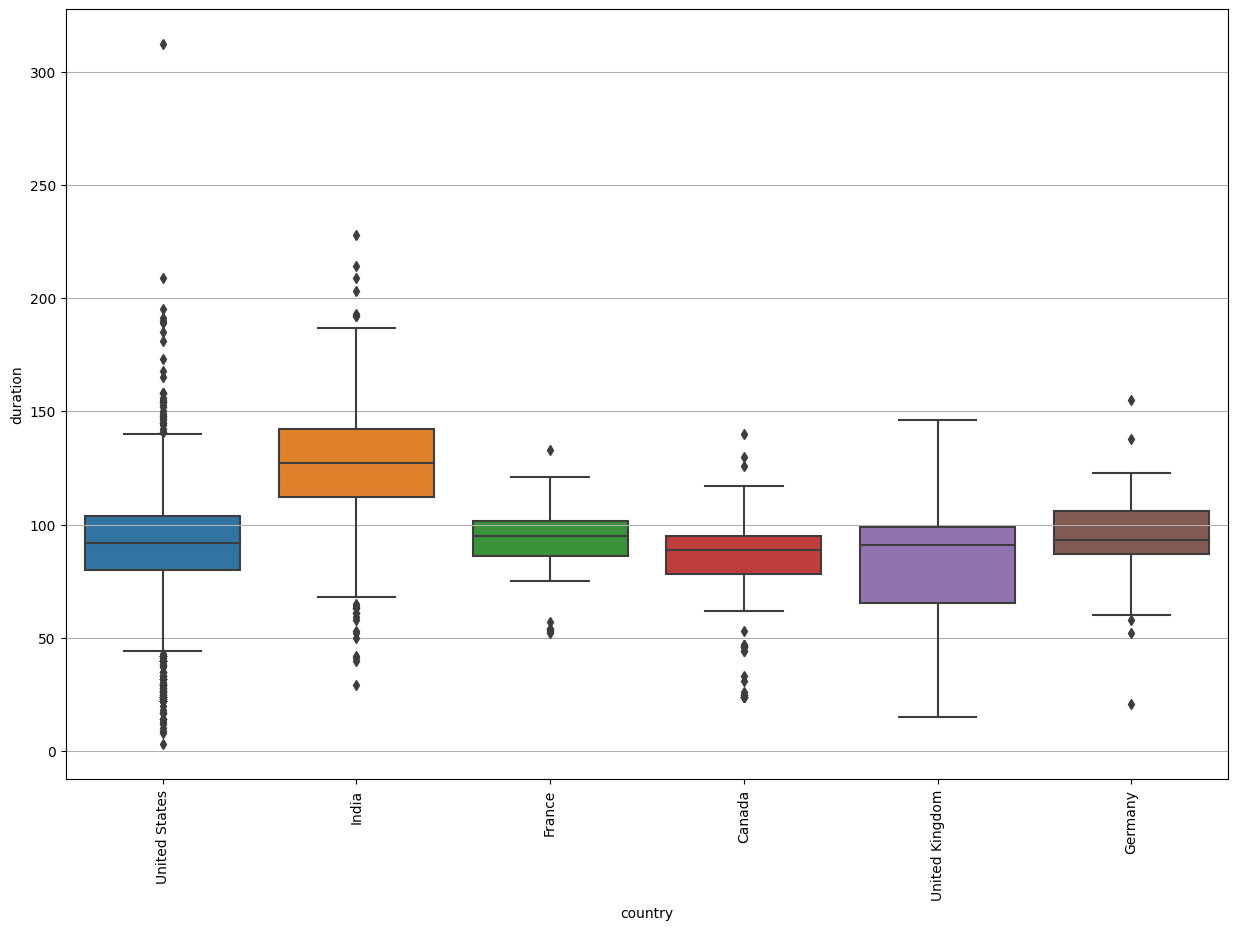

In [446]:
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(data=df[(df['type']=='Movie')& (df['country'].isin(['United States','India','United Kingdom','Canada','France','Germany']))], y='duration',x='country')
plt.xticks(rotation=90)
plt.show()

Insights
- The duration of movies is reduced every year. Hence it is recommened that realse a movie with less than 100 min
- As compare to top 6 countries releasing a movie India has the highest duration. Hence for India movies duration around 2 hours is recommened

### Genre

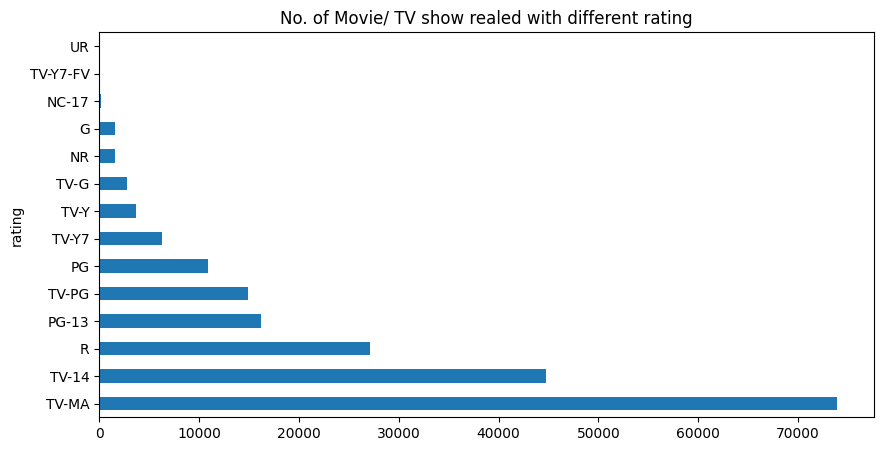

In [447]:
plt.figure(figsize=(10,5))
df_merged['rating'].value_counts().plot(kind='barh')
plt.title('No. of Movie/ TV show realed with different rating')
plt.show()

Insights
- TV MA rated is most released for TV Shows
- R rated movies are most popular

### correlation

<Axes: xlabel='month', ylabel='release_year'>

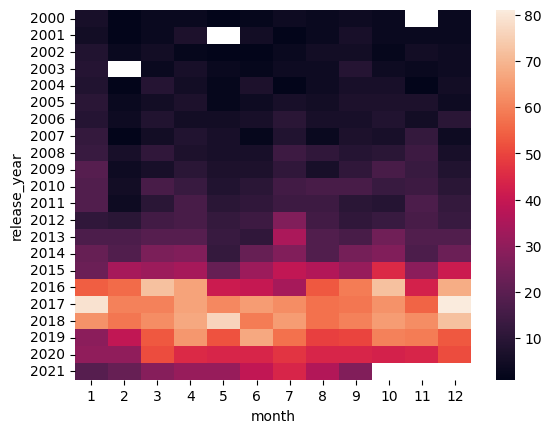

In [448]:
#df2 = df1.pivot(index="release_year", columns=['month'], values="title")
df2=df1[(df1['type']=='Movie')&(df1['release_year']>=2000)].groupby(['release_year','month']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).pivot(index="release_year", columns=['month'], values="title")
sns.heatmap(data=df2)

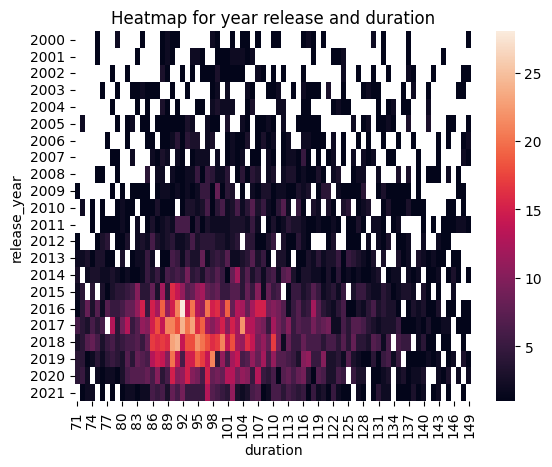

In [449]:
#df2 = df1.pivot(index="release_year", columns=['month'], values="title")
df2=df1[(df1['type']=='Movie')&(df1['release_year']>=2000)&(df1['duration']>70)&(df1['duration']<150)].groupby(['release_year','duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).pivot(index="release_year", columns=['duration'], values="title")
sns.heatmap(data=df2)
plt.title('Heatmap for year release and duration')
plt.show()

Insights
- 2016-2020 shows the high corelation beteen 85-100 min duration as most movies released that time have the same length

C:\Users\pritk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x3000 with 0 Axes>

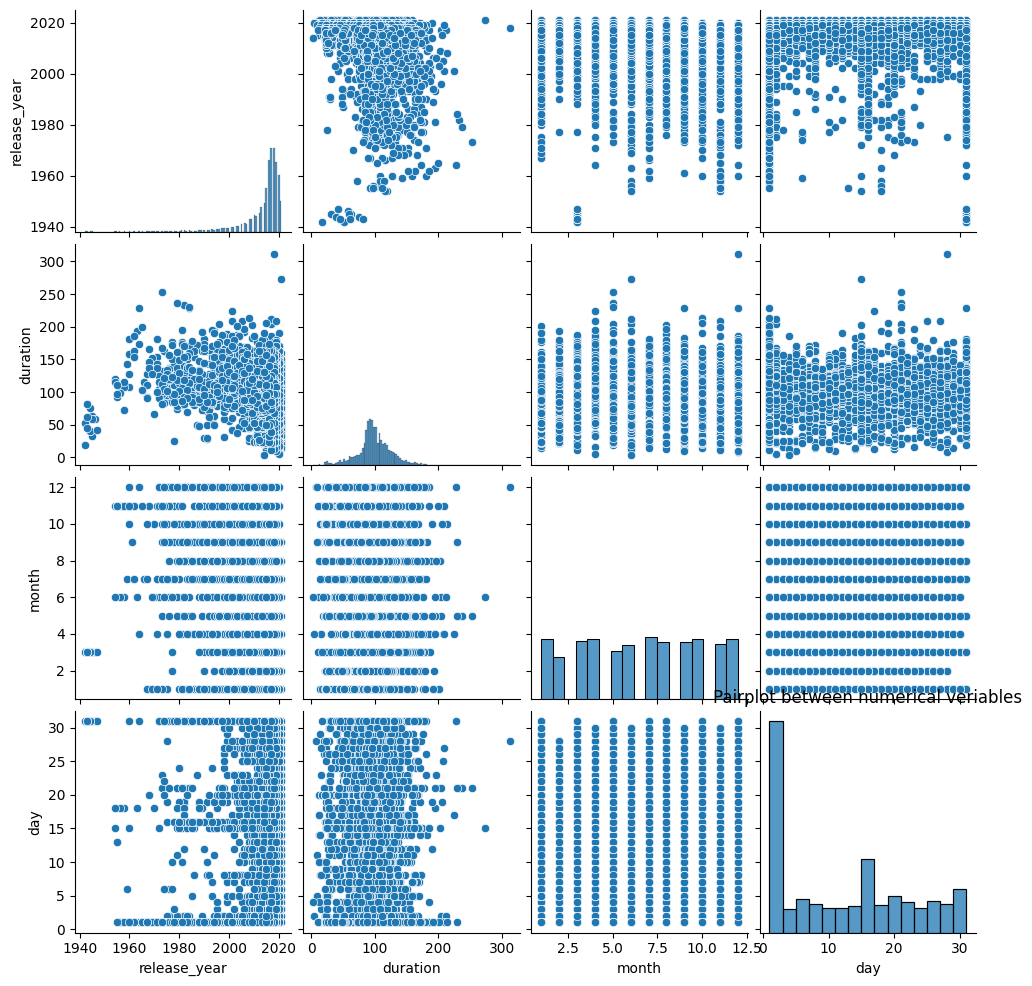

In [450]:
plt.figure(figsize=(15,30))
sns.pairplot(data=df1[df1['type']=='Movie'][['release_year','duration','month','day']])
plt.title('Pairplot between numerical veriables')
plt.show()

Insights
- We can say that with duration and release year has some meaning full relation
- the short movies increased within recent years

### Outlier

In [451]:
df_merged[(df_merged['type']=='Movie')&(df_merged['duration']>=180)].groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,director,title
13,Hidenori Inoue,6
1,Ashutosh Gowariker,4
16,Karan Johar,3
21,Martin Scorsese,2
30,Sooraj R. Barjatya,2


- Hidenori Inoue is the one who used to make long duration movies

### Combined analysis for Indian Movies

In [452]:
df_merged[(df_merged['type']=='Movie')&(df_merged['country']=='India')].groupby(['director','cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,director,cast,title
1471,David Dhawan,Anupam Kher,6
6252,Sooraj R. Barjatya,Alok Nath,5
6277,Sooraj R. Barjatya,Salman Khan,5
4747,Rajiv Chilaka,Julie Tejwani,4
6269,Sooraj R. Barjatya,Mohnish Bahl,4


In [453]:
df_merged[(df_merged['type']=='Movie')&(df_merged['country']=='India')].groupby(['director','listed_in']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,director,listed_in,title
431,David Dhawan,Comedies,9
1981,Umesh Mehra,International Movies,8
238,Anurag Kashyap,International Movies,8
433,David Dhawan,International Movies,8
476,Dibakar Banerjee,International Movies,7


In [454]:
df_merged[(df_merged['type']=='Movie')&(df_merged['country']=='India')].groupby(['director','listed_in','cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,director,listed_in,cast,title
4016,David Dhawan,Comedies,Anupam Kher,6
17344,Sooraj R. Barjatya,Dramas,Salman Khan,5
17382,Sooraj R. Barjatya,International Movies,Salman Khan,5
17319,Sooraj R. Barjatya,Dramas,Alok Nath,5
4090,David Dhawan,International Movies,Anupam Kher,5


Insights
- David dhavan and Anupam Kher is best combination to release movie
- David dhavan directed comedy movie is recommended to released

### Combined analysis for United States Movies

In [455]:
df_merged[(df_merged['type']=='Movie')&(df_merged['country']=='United States')].groupby(['listed_in','cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,listed_in,cast,title
6595,Comedies,Adam Sandler,18
5690,Children & Family Movies,Tara Strong,14
4757,Children & Family Movies,Laura Bailey,14
4594,Children & Family Movies,Kate Higgins,13
9763,Comedies,Molly Shannon,13


In [456]:
df_merged[(df_merged['type']=='Movie')&(df_merged['country']=='United States')].groupby(['director','listed_in']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head(5)

,director,listed_in,title
2766,Marcus Raboy,Stand-Up Comedy,14
1845,Jay Karas,Stand-Up Comedy,14
1841,Jay Chapman,Stand-Up Comedy,12
2866,Martin Scorsese,Dramas,9
1171,Don Michael Paul,Action & Adventure,9


Insights
- Comedy movie with actor Adam Sandler is best combination
- Marcus Raboy or Jay Karas directed Stand-Up Comedy movie is recommended to released

## Recommendations

- International, Drama and Comedies are most popular Gerne in TV and movies So contenet on that is recommended.
- Tv shows are more recommended than Movies in upcomming year.
- But in India Popularity of TV show is growing but still Netfilx has to focus on Movies as its still more popular than tv show.
- Movies less than 100 min is recommended oerall but In India Movies around 2 Hours duration is recommended.
- Add movies for Indian Audience, it has been declining since 2018.
- Relese a TV show with TV-MA rated and R rated Movies
- Relasing a Movie directed by David dhavan and Anupam Kher as cast in Comedy genre is recommended